In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df_train_est_A = pd.read_csv('train_est_B.csv')
df_train_obs_A = pd.read_csv('train_obs_B.csv')
df_test_A = pd.read_csv('X_test_B.csv')
df_train_est_A = df_train_est_A.rename(columns={'Unnamed: 0': 'date_forecast'})

df_train_obs_A = df_train_obs_A.rename(columns={'Unnamed: 0': 'date_forecast'})

df_test_A = df_test_A.rename(columns={'Unnamed: 0': 'date_forecast'})

df_train_est_A.set_index('date_forecast', inplace=True)
df_train_obs_A.set_index('date_forecast', inplace=True)
df_test_A.set_index('date_forecast', inplace=True)
df_train_obs_A.index = pd.to_datetime(df_train_obs_A.index)
df_train_obs_A.index = pd.to_datetime(df_train_obs_A.index)

In [6]:
df_train_est_A=df_train_est_A.drop(columns=['date_calc'])


In [7]:

df = pd.concat([df_train_obs_A,df_train_est_A])
df.index = pd.to_datetime(df.index)
df['hours'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df_test_A.index = pd.to_datetime(df_test_A.index)
df_test_A['hours'] = df_test_A.index.hour
df_test_A['day'] = df_test_A.index.day
df_test_A['month'] = df_test_A.index.month
df_test_A['year'] = df_test_A.index.year
df_test_A = df_test_A.drop(columns = 'date_calc', axis = 1)

In [8]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df_test_A = df_test_A.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [9]:
df['snow_densitykgm3'].fillna(0)
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.fillna(0)

,absolute_humidity_2mgm3,air_density_2mkgm3,ceiling_height_aglm,clear_sky_energy_1hJ,clear_sky_radW,cloud_base_aglm,dew_or_rimeidx,dew_point_2mK,diffuse_radW,diffuse_rad_1hJ,...,visibilitym,wind_speed_10mms,wind_speed_u_10mms,wind_speed_v_10mms,wind_speed_w_1000hPams,pv_measurement,hours,day,month,year
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,5.525,1.23975,1200.6750,0.000,0.000,1200.6750,0.0,275.150,0.000,0.000,...,16827.800,2.800,1.175,2.550,0.0,0.000000,0,1,1,2019
2019-01-01 01:00:00,5.425,1.23975,1131.4249,0.000,0.000,1131.4249,0.0,274.825,0.000,0.000,...,12777.449,3.550,1.525,3.200,0.0,0.000000,1,1,1,2019
2019-01-01 02:00:00,5.400,1.23850,1061.0000,0.000,0.000,1061.0000,0.0,274.800,0.000,0.000,...,11140.500,4.025,2.150,3.425,0.0,0.000000,2,1,1,2019
2019-01-01 03:00:00,5.350,1.23975,1021.1500,0.000,0.000,1021.1500,0.0,274.675,0.000,0.000,...,6799.200,4.900,3.425,3.500,0.0,0.000000,3,1,1,2019
2019-01-01 04:00:00,5.675,1.23750,1033.7000,0.000,0.000,1033.7000,0.0,275.500,0.000,0.000,...,5580.475,6.050,5.575,2.200,0.0,0.000000,4,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,4.550,1.27650,1677.9500,84462.520,4.225,542.8500,0.0,272.425,2.825,56433.973,...,23434.074,5.175,4.800,1.925,0.0,0.828587,19,30,4,2023
2023-04-30 20:00:00,4.500,1.27875,1766.5000,2270.775,0.000,546.3500,0.0,272.300,0.000,5067.025,...,21307.725,4.650,4.025,2.300,0.0,-0.000000,20,30,4,2023
2023-04-30 21:00:00,4.500,1.27900,1698.9250,0.000,0.000,548.0500,0.0,272.300,0.000,0.000,...,21159.225,4.450,3.600,2.600,0.0,-0.000000,21,30,4,2023


In [10]:
import lightgbm as lgb
model = lgb.LGBMRegressor(importance_type='gain')

In [14]:
X_train = df.drop(columns = 'pv_measurement')
y_train = df['pv_measurement']

In [15]:
model.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7944
[LightGBM] [Info] Number of data points in the train set: 32847, number of used features: 46
[LightGBM] [Info] Start training from score 96.815935


LGBMRegressor(importance_type='gain')

In [16]:
feature_importance = model.feature_importances_
# Define a threshold for feature importance
threshold = 0.0005  # Adjust this value as needed

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
# Filter features above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature']

# Create a new DataFrame with the selected features
X_selected = X_train[selected_features]
X_selected['pv_measurement'] = df['pv_measurement']


C:\Users\claxl\AppData\Local\Temp\ipykernel_15000\3299040996.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['pv_measurement'] = df['pv_measurement']


In [17]:
from sklearn.neighbors import LocalOutlierFactor
df = X_selected
# Crea un modello di rilevamento delle anomalie
clf = LocalOutlierFactor(n_neighbors=20)

# Identifica i dati anomali
anomalies = clf.fit_predict(df)
df[anomalies == -1]
# Stampa i dati anomali
df = df[anomalies != -1]

In [38]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Sample DataFrame (replace this with your own dataset)
data = df

# Define the number of splits (e.g., 5 for 80-20 train-test splits)
n_splits =5


# Initialize the TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)


In [39]:
def objective(trial):
    param = {
            'metric': 'mae', 
            'random_state': 42,
            'n_estimators': trial.suggest_int('n_estimators',10,1000),
            'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
            'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
            'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
            'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4,1e-1),
            'max_depth': trial.suggest_int('max_depth', 1,50),
            'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
            'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
            'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100),
            'verbosity': -1
        }
    model = lgb.LGBMRegressor(**param)
    maelist = []
    for train_index, test_index in tscv.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]

        # Extract target variable for training and testing data
        y_train = train_data['pv_measurement']
        y_test = test_data['pv_measurement']

        # Extract features for training and testing data
        X_train = train_data.drop(columns = 'pv_measurement')
        X_test = test_data.drop(columns = 'pv_measurement')
        
        # Train the XGBoost model
        model.fit(X_train, y_train,eval_set=[(X_test,y_test)])

        # Make predictions on the test data
        y_pred = model.predict(X_test)

        # Evaluate the model using Mean Absolute Error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        print("Mean Absolute Error:", mae)
        maelist.append(mae)
    # Return MAE
    mean_mae = np.mean(maelist)

    return mean_mae

In [40]:
import optuna
import warnings
warnings.filterwarnings("ignore")
from warnings import simplefilter
simplefilter("ignore", category=RuntimeWarning)
study = optuna.create_study(direction='minimize')

[I 2023-10-25 22:51:58,010] A new study created in memory with name: no-name-6694f552-c047-4497-b314-c5d9f0ea1875


In [41]:
study.optimize(objective, n_trials=50)

Mean Absolute Error: 27.532276467725026
Mean Absolute Error: 87.25704974210215
Mean Absolute Error: 59.240412711123696
Mean Absolute Error: 40.48892288211758


[I 2023-10-25 22:52:01,266] Trial 0 finished with value: 50.481642326997154 and parameters: {'n_estimators': 520, 'reg_alpha': 0.007269729173474888, 'reg_lambda': 0.43310558841073515, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.026906701698640362, 'max_depth': 1, 'num_leaves': 635, 'min_child_samples': 282, 'min_data_per_groups': 34}. Best is trial 0 with value: 50.481642326997154.


Mean Absolute Error: 37.889549831917314
Mean Absolute Error: 47.12139786645826
Mean Absolute Error: 82.19165781178748
Mean Absolute Error: 72.15912525366682
Mean Absolute Error: 56.996268015146875


[I 2023-10-25 22:52:06,158] Trial 1 finished with value: 62.15320052749181 and parameters: {'n_estimators': 512, 'reg_alpha': 0.0038700958960128247, 'reg_lambda': 1.1687132171259256, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.002976036534121521, 'max_depth': 26, 'num_leaves': 262, 'min_child_samples': 280, 'min_data_per_groups': 86}. Best is trial 0 with value: 50.481642326997154.


Mean Absolute Error: 52.29755369039966
Mean Absolute Error: 140.35559921805785
Mean Absolute Error: 130.12416889164598
Mean Absolute Error: 144.4648736376564
Mean Absolute Error: 115.05206336526449


[I 2023-10-25 22:52:17,777] Trial 2 finished with value: 128.3022738080325 and parameters: {'n_estimators': 712, 'reg_alpha': 0.04450824140351832, 'reg_lambda': 0.030609989598932782, 'colsample_bytree': 0.7, 'subsample': 0.7, 'learning_rate': 0.00011522608529190342, 'max_depth': 28, 'num_leaves': 426, 'min_child_samples': 157, 'min_data_per_groups': 90}. Best is trial 0 with value: 50.481642326997154.


Mean Absolute Error: 111.51466392753773
Mean Absolute Error: 25.12110299782103
Mean Absolute Error: 84.46546996666655
Mean Absolute Error: 51.27111100367671
Mean Absolute Error: 53.83556042119333


[I 2023-10-25 22:52:28,795] Trial 3 finished with value: 52.362719659114894 and parameters: {'n_estimators': 663, 'reg_alpha': 0.0010368816787057408, 'reg_lambda': 0.002487794130027688, 'colsample_bytree': 0.8, 'subsample': 0.7, 'learning_rate': 0.042986221572558755, 'max_depth': 33, 'num_leaves': 327, 'min_child_samples': 272, 'min_data_per_groups': 10}. Best is trial 0 with value: 50.481642326997154.


Mean Absolute Error: 47.12035390621687
Mean Absolute Error: 24.615977655715454
Mean Absolute Error: 83.68898375018196
Mean Absolute Error: 51.13379829576435
Mean Absolute Error: 52.86084302358818


[I 2023-10-25 22:52:44,951] Trial 4 finished with value: 51.506745703185985 and parameters: {'n_estimators': 943, 'reg_alpha': 8.225132495639471, 'reg_lambda': 0.0012502365870025358, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 0.020626055929780802, 'max_depth': 30, 'num_leaves': 807, 'min_child_samples': 281, 'min_data_per_groups': 48}. Best is trial 0 with value: 50.481642326997154.


Mean Absolute Error: 45.234125790679975
Mean Absolute Error: 37.89799017423642
Mean Absolute Error: 80.71484212133235
Mean Absolute Error: 64.48104356728841
Mean Absolute Error: 56.00975851301938


[I 2023-10-25 22:52:54,952] Trial 5 finished with value: 57.497175836776265 and parameters: {'n_estimators': 696, 'reg_alpha': 0.45922627633443597, 'reg_lambda': 0.047778304989334455, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.002832470233446067, 'max_depth': 26, 'num_leaves': 193, 'min_child_samples': 227, 'min_data_per_groups': 57}. Best is trial 0 with value: 50.481642326997154.


Mean Absolute Error: 48.382244808004714
Mean Absolute Error: 24.825216183768298
Mean Absolute Error: 83.10514634313762
Mean Absolute Error: 50.589587457865456
Mean Absolute Error: 49.682691259233984


[I 2023-10-25 22:53:09,451] Trial 6 finished with value: 50.25302724974017 and parameters: {'n_estimators': 923, 'reg_alpha': 0.580769513969521, 'reg_lambda': 0.06470416368216708, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.012788341733226242, 'max_depth': 39, 'num_leaves': 670, 'min_child_samples': 279, 'min_data_per_groups': 83}. Best is trial 6 with value: 50.25302724974017.


Mean Absolute Error: 43.06249500469549
Mean Absolute Error: 106.50409890200017
Mean Absolute Error: 104.3435363212713
Mean Absolute Error: 116.70056024561988
Mean Absolute Error: 94.00021813508579


[I 2023-10-25 22:53:11,095] Trial 7 finished with value: 102.40141344344086 and parameters: {'n_estimators': 46, 'reg_alpha': 0.04148138039040271, 'reg_lambda': 0.0019155770210869515, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.008298833761898623, 'max_depth': 39, 'num_leaves': 437, 'min_child_samples': 53, 'min_data_per_groups': 96}. Best is trial 6 with value: 50.25302724974017.


Mean Absolute Error: 90.45865361322716
Mean Absolute Error: 34.49696229355006
Mean Absolute Error: 79.07159345123878
Mean Absolute Error: 60.008557211995225
Mean Absolute Error: 52.96049926371532


[I 2023-10-25 22:53:22,801] Trial 8 finished with value: 54.70463702035469 and parameters: {'n_estimators': 348, 'reg_alpha': 0.08006602559174877, 'reg_lambda': 0.0033449291260895892, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.0060674234243096176, 'max_depth': 42, 'num_leaves': 571, 'min_child_samples': 44, 'min_data_per_groups': 1}. Best is trial 6 with value: 50.25302724974017.


Mean Absolute Error: 46.985572881274045
Mean Absolute Error: 22.782388419722945
Mean Absolute Error: 79.8209410389234
Mean Absolute Error: 51.87607949331424
Mean Absolute Error: 42.11269914930712


[I 2023-10-25 22:53:26,182] Trial 9 finished with value: 46.93355700359111 and parameters: {'n_estimators': 691, 'reg_alpha': 0.2151999113577783, 'reg_lambda': 0.0026717048957899084, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 0.017933751377625026, 'max_depth': 22, 'num_leaves': 6, 'min_child_samples': 83, 'min_data_per_groups': 10}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 38.07567691668789
Mean Absolute Error: 27.721026219102136
Mean Absolute Error: 88.02727366902725
Mean Absolute Error: 59.31918049203007
Mean Absolute Error: 41.85781452885912


[I 2023-10-25 22:53:27,066] Trial 10 finished with value: 51.180487384491755 and parameters: {'n_estimators': 174, 'reg_alpha': 0.49469950588182054, 'reg_lambda': 0.010534959727759525, 'colsample_bytree': 0.3, 'subsample': 0.5, 'learning_rate': 0.0856458743096801, 'max_depth': 12, 'num_leaves': 2, 'min_child_samples': 125, 'min_data_per_groups': 21}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 38.97714201344017
Mean Absolute Error: 22.266400036163816
Mean Absolute Error: 82.83983378800326
Mean Absolute Error: 49.418392469689984
Mean Absolute Error: 49.54402370155271


[I 2023-10-25 22:53:47,579] Trial 11 finished with value: 49.47828292120166 and parameters: {'n_estimators': 999, 'reg_alpha': 0.6517520205709308, 'reg_lambda': 9.511868244448129, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 0.012184253824081216, 'max_depth': 50, 'num_leaves': 910, 'min_child_samples': 114, 'min_data_per_groups': 63}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 43.322764610598554
Mean Absolute Error: 26.46959749900629
Mean Absolute Error: 85.73375670322699
Mean Absolute Error: 51.616968863998295
Mean Absolute Error: 53.384541166938284


[I 2023-10-25 22:54:10,944] Trial 12 finished with value: 52.586528668845986 and parameters: {'n_estimators': 995, 'reg_alpha': 2.221765696320808, 'reg_lambda': 5.241204812054956, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 0.06907714383512073, 'max_depth': 50, 'num_leaves': 863, 'min_child_samples': 109, 'min_data_per_groups': 66}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 45.727779111060094
Mean Absolute Error: 22.058172845553415
Mean Absolute Error: 81.4205016629795
Mean Absolute Error: 49.75042122840718
Mean Absolute Error: 46.393325741256454


[I 2023-10-25 22:54:19,670] Trial 13 finished with value: 48.214181988136446 and parameters: {'n_estimators': 807, 'reg_alpha': 0.24762709848522668, 'reg_lambda': 0.34908295145019214, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 0.020260164500601863, 'max_depth': 14, 'num_leaves': 41, 'min_child_samples': 2, 'min_data_per_groups': 37}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 41.44848846248566
Mean Absolute Error: 23.50386225766562
Mean Absolute Error: 80.9284385022207
Mean Absolute Error: 50.391222973090166
Mean Absolute Error: 45.43436815972936


[I 2023-10-25 22:54:25,095] Trial 14 finished with value: 48.51012029765128 and parameters: {'n_estimators': 803, 'reg_alpha': 0.15865773568556293, 'reg_lambda': 0.2731052149053323, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.029981124300772977, 'max_depth': 16, 'num_leaves': 17, 'min_child_samples': 8, 'min_data_per_groups': 32}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 42.29270959555055
Mean Absolute Error: 22.831649885235255
Mean Absolute Error: 80.61618362455917
Mean Absolute Error: 50.83756686060457
Mean Absolute Error: 46.47650198328834


[I 2023-10-25 22:54:46,995] Trial 15 finished with value: 48.22206861407129 and parameters: {'n_estimators': 807, 'reg_alpha': 0.14709073865164768, 'reg_lambda': 0.012632520569902096, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.005298082658710422, 'max_depth': 17, 'num_leaves': 145, 'min_child_samples': 3, 'min_data_per_groups': 41}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 40.34844071666913
Mean Absolute Error: 20.867706162339076
Mean Absolute Error: 81.68155895172134
Mean Absolute Error: 49.37068042838804
Mean Absolute Error: 51.152894220396334


[I 2023-10-25 22:54:51,544] Trial 16 finished with value: 49.201046576107196 and parameters: {'n_estimators': 409, 'reg_alpha': 2.8445062467846145, 'reg_lambda': 0.1693750144744918, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.018921340345178637, 'max_depth': 6, 'num_leaves': 80, 'min_child_samples': 58, 'min_data_per_groups': 22}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 42.93239311769117
Mean Absolute Error: 24.86337522286696
Mean Absolute Error: 84.19771971318242
Mean Absolute Error: 51.22875174264193
Mean Absolute Error: 50.08583866990564


[I 2023-10-25 22:54:59,472] Trial 17 finished with value: 51.09616524729537 and parameters: {'n_estimators': 603, 'reg_alpha': 0.018343127375390962, 'reg_lambda': 0.09904213975168767, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.04665478647264769, 'max_depth': 20, 'num_leaves': 290, 'min_child_samples': 167, 'min_data_per_groups': 19}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 45.10514088787989
Mean Absolute Error: 46.162880865436904
Mean Absolute Error: 80.60744412018705
Mean Absolute Error: 69.51417360205693
Mean Absolute Error: 64.46212353710902


[I 2023-10-25 22:55:19,142] Trial 18 finished with value: 63.39233288577829 and parameters: {'n_estimators': 844, 'reg_alpha': 0.19273064632885523, 'reg_lambda': 0.0067491150872675655, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 0.0017519842105312884, 'max_depth': 10, 'num_leaves': 144, 'min_child_samples': 77, 'min_data_per_groups': 6}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 56.21504230410146
Mean Absolute Error: 24.918810626103173
Mean Absolute Error: 85.36778966597939
Mean Absolute Error: 51.55683730272289
Mean Absolute Error: 54.22836324926265


[I 2023-10-25 22:55:24,716] Trial 19 finished with value: 52.57075136961275 and parameters: {'n_estimators': 352, 'reg_alpha': 0.06799340031598473, 'reg_lambda': 0.0010886573076425436, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.08930024457972209, 'max_depth': 21, 'num_leaves': 370, 'min_child_samples': 188, 'min_data_per_groups': 31}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 46.781956003995624
Mean Absolute Error: 22.64801914130323
Mean Absolute Error: 83.37581956897911
Mean Absolute Error: 49.741320213646596
Mean Absolute Error: 52.58340484985325


[I 2023-10-25 22:55:36,116] Trial 20 finished with value: 50.506502342945055 and parameters: {'n_estimators': 594, 'reg_alpha': 0.023028810383093644, 'reg_lambda': 0.020053577594042478, 'colsample_bytree': 0.7, 'subsample': 0.8, 'learning_rate': 0.03859067298299965, 'max_depth': 11, 'num_leaves': 212, 'min_child_samples': 28, 'min_data_per_groups': 74}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 44.18394794094307
Mean Absolute Error: 21.589707395967018
Mean Absolute Error: 80.4469245024648
Mean Absolute Error: 50.2003996266507
Mean Absolute Error: 46.433018214129554


[I 2023-10-25 22:56:01,688] Trial 21 finished with value: 47.85363360477065 and parameters: {'n_estimators': 828, 'reg_alpha': 0.26175634104145923, 'reg_lambda': 0.006562027996100097, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.00606713189515476, 'max_depth': 19, 'num_leaves': 112, 'min_child_samples': 10, 'min_data_per_groups': 45}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 40.59811828464119
Mean Absolute Error: 22.453087226694336
Mean Absolute Error: 82.54925791905305
Mean Absolute Error: 49.35984735914311
Mean Absolute Error: 48.28396797276655


[I 2023-10-25 22:56:14,917] Trial 22 finished with value: 49.059762753712604 and parameters: {'n_estimators': 795, 'reg_alpha': 0.2710906608751384, 'reg_lambda': 0.004770344381327305, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.013292396042896906, 'max_depth': 21, 'num_leaves': 81, 'min_child_samples': 84, 'min_data_per_groups': 47}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 42.65265329090599
Mean Absolute Error: 21.80894543082428
Mean Absolute Error: 81.23913008396813
Mean Absolute Error: 49.05807776226522
Mean Absolute Error: 47.185012278161715


[I 2023-10-25 22:56:32,234] Trial 23 finished with value: 48.21186729087093 and parameters: {'n_estimators': 888, 'reg_alpha': 0.09541983640285026, 'reg_lambda': 0.006131151523436368, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.009074390888701652, 'max_depth': 16, 'num_leaves': 84, 'min_child_samples': 26, 'min_data_per_groups': 39}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 41.76817089913527
Mean Absolute Error: 20.508966906136276
Mean Absolute Error: 80.7898355402833
Mean Absolute Error: 50.21129964385404
Mean Absolute Error: 52.98067220255519


[I 2023-10-25 22:56:44,701] Trial 24 finished with value: 49.54341147896378 and parameters: {'n_estimators': 887, 'reg_alpha': 0.09905495976078181, 'reg_lambda': 0.004597523968151413, 'colsample_bytree': 1.0, 'subsample': 0.6, 'learning_rate': 0.006229669547791094, 'max_depth': 6, 'num_leaves': 135, 'min_child_samples': 27, 'min_data_per_groups': 53}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 43.226283101990106
Mean Absolute Error: 53.819302194418114
Mean Absolute Error: 82.118610799332
Mean Absolute Error: 75.78723193976938
Mean Absolute Error: 62.726883585803314


[I 2023-10-25 22:57:03,713] Trial 25 finished with value: 66.45598192000479 and parameters: {'n_estimators': 732, 'reg_alpha': 1.0657274304723445, 'reg_lambda': 0.009860026239178605, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.0017398366196138364, 'max_depth': 22, 'num_leaves': 229, 'min_child_samples': 84, 'min_data_per_groups': 27}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 57.82788108070109
Mean Absolute Error: 21.363462788130594
Mean Absolute Error: 80.96465974540656
Mean Absolute Error: 49.499420440723
Mean Absolute Error: 47.305235530370105


[I 2023-10-25 22:57:21,923] Trial 26 finished with value: 48.122504262455074 and parameters: {'n_estimators': 625, 'reg_alpha': 0.10950941217200118, 'reg_lambda': 0.022190666889421548, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.008700848535003705, 'max_depth': 33, 'num_leaves': 87, 'min_child_samples': 32, 'min_data_per_groups': 44}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 41.4797428076451
Mean Absolute Error: 27.720735779680435
Mean Absolute Error: 79.37622632056583
Mean Absolute Error: 54.678031814769334
Mean Absolute Error: 49.76708140270811


[I 2023-10-25 22:57:51,230] Trial 27 finished with value: 50.95876979173977 and parameters: {'n_estimators': 606, 'reg_alpha': 0.28765768227998967, 'reg_lambda': 0.02257413685063806, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.004623194470333003, 'max_depth': 34, 'num_leaves': 177, 'min_child_samples': 68, 'min_data_per_groups': 13}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 43.25177364097514
Mean Absolute Error: 21.152385365352774
Mean Absolute Error: 82.15977613432601
Mean Absolute Error: 49.72717627109631
Mean Absolute Error: 47.659333333345295


[I 2023-10-25 22:58:08,651] Trial 28 finished with value: 48.48837999272755 and parameters: {'n_estimators': 474, 'reg_alpha': 1.2735506149677553, 'reg_lambda': 0.002904413221721272, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.013087457035326077, 'max_depth': 31, 'num_leaves': 344, 'min_child_samples': 101, 'min_data_per_groups': 72}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 41.743228859517345
Mean Absolute Error: 23.66420707061666
Mean Absolute Error: 84.24677578532177
Mean Absolute Error: 49.866908984072154
Mean Absolute Error: 52.58611355054728


[I 2023-10-25 22:58:25,601] Trial 29 finished with value: 51.075289504540386 and parameters: {'n_estimators': 638, 'reg_alpha': 0.1442724709019374, 'reg_lambda': 0.016930684548161566, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.02782979029334263, 'max_depth': 23, 'num_leaves': 622, 'min_child_samples': 135, 'min_data_per_groups': 56}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 45.01244213214408
Mean Absolute Error: 29.28378327089632
Mean Absolute Error: 84.47617248881295
Mean Absolute Error: 66.01319933044309
Mean Absolute Error: 45.63265490825393


[I 2023-10-25 22:58:27,844] Trial 30 finished with value: 53.75714821656445 and parameters: {'n_estimators': 562, 'reg_alpha': 0.3051118439034491, 'reg_lambda': 0.03627527973187974, 'colsample_bytree': 1.0, 'subsample': 0.5, 'learning_rate': 0.008599474231758638, 'max_depth': 1, 'num_leaves': 3, 'min_child_samples': 39, 'min_data_per_groups': 46}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 43.37993108441596
Mean Absolute Error: 21.723221767702967
Mean Absolute Error: 80.69010415701845
Mean Absolute Error: 49.56771831500667
Mean Absolute Error: 46.761202868387386


[I 2023-10-25 22:58:51,013] Trial 31 finished with value: 47.96861171249637 and parameters: {'n_estimators': 748, 'reg_alpha': 0.10867169766856793, 'reg_lambda': 0.0069109088317310325, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.008027570072361562, 'max_depth': 17, 'num_leaves': 86, 'min_child_samples': 23, 'min_data_per_groups': 36}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 41.10081145436639
Mean Absolute Error: 23.820456718549245
Mean Absolute Error: 79.17884963505463
Mean Absolute Error: 52.96125695899752
Mean Absolute Error: 50.366447817495995


[I 2023-10-25 22:59:13,264] Trial 32 finished with value: 50.00518107921022 and parameters: {'n_estimators': 732, 'reg_alpha': 0.05329310847784772, 'reg_lambda': 0.007733648786225168, 'colsample_bytree': 0.5, 'subsample': 0.6, 'learning_rate': 0.004200930654409813, 'max_depth': 18, 'num_leaves': 113, 'min_child_samples': 19, 'min_data_per_groups': 43}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 43.6988942659537
Mean Absolute Error: 31.485536245509852
Mean Absolute Error: 79.03036383509502
Mean Absolute Error: 57.884045908667915
Mean Absolute Error: 51.61401400146318


[I 2023-10-25 22:59:41,328] Trial 33 finished with value: 53.126208686314534 and parameters: {'n_estimators': 768, 'reg_alpha': 0.03182424760097005, 'reg_lambda': 0.012244907653001413, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.003052563648263918, 'max_depth': 25, 'num_leaves': 267, 'min_child_samples': 46, 'min_data_per_groups': 26}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 45.617083440836694
Mean Absolute Error: 21.8529784854399
Mean Absolute Error: 80.96008094983627
Mean Absolute Error: 50.20194777598634
Mean Absolute Error: 51.579916618326976


[I 2023-10-25 22:59:49,136] Trial 34 finished with value: 49.59093471199553 and parameters: {'n_estimators': 500, 'reg_alpha': 0.12366245704860905, 'reg_lambda': 0.0020227315465838392, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 0.0076962812523076385, 'max_depth': 28, 'num_leaves': 61, 'min_child_samples': 64, 'min_data_per_groups': 34}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 43.35974973038814
Mean Absolute Error: 22.46903115575819
Mean Absolute Error: 83.68234400426533
Mean Absolute Error: 49.72801371038434
Mean Absolute Error: 53.79605582095746


[I 2023-10-25 23:00:07,844] Trial 35 finished with value: 51.009542965958886 and parameters: {'n_estimators': 681, 'reg_alpha': 0.016855932380118108, 'reg_lambda': 0.026605904282548515, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.017056905281036122, 'max_depth': 25, 'num_leaves': 223, 'min_child_samples': 95, 'min_data_per_groups': 15}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 45.37227013842911
Mean Absolute Error: 34.71952504732042
Mean Absolute Error: 79.09172331106238
Mean Absolute Error: 60.24753578988526
Mean Absolute Error: 53.49436422108224


[I 2023-10-25 23:00:28,608] Trial 36 finished with value: 55.054704440435955 and parameters: {'n_estimators': 547, 'reg_alpha': 0.061220131993687456, 'reg_lambda': 0.005114298474174736, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.00378030939991203, 'max_depth': 34, 'num_leaves': 481, 'min_child_samples': 37, 'min_data_per_groups': 50}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 47.7203738328295
Mean Absolute Error: 25.511651385972385
Mean Absolute Error: 83.58747115906056
Mean Absolute Error: 50.640990265100285
Mean Absolute Error: 51.14315521720333


[I 2023-10-25 23:00:39,567] Trial 37 finished with value: 51.12419380266134 and parameters: {'n_estimators': 654, 'reg_alpha': 0.36661361394155356, 'reg_lambda': 0.0018815126045037204, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.02481209020819084, 'max_depth': 29, 'num_leaves': 744, 'min_child_samples': 244, 'min_data_per_groups': 58}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 44.737700985970164
Mean Absolute Error: 23.924357478247405
Mean Absolute Error: 81.08085045460207
Mean Absolute Error: 50.63640291496171
Mean Absolute Error: 44.775760789860044


[I 2023-10-25 23:00:56,028] Trial 38 finished with value: 47.887404009073464 and parameters: {'n_estimators': 704, 'reg_alpha': 0.215081364818055, 'reg_lambda': 0.003475365894706875, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.009894828803831954, 'max_depth': 19, 'num_leaves': 172, 'min_child_samples': 13, 'min_data_per_groups': 7}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 39.019648407696074
Mean Absolute Error: 24.588245633673086
Mean Absolute Error: 81.17768565358128
Mean Absolute Error: 51.65104645819427
Mean Absolute Error: 44.34357432363437


[I 2023-10-25 23:01:44,045] Trial 39 finished with value: 48.265038590156436 and parameters: {'n_estimators': 861, 'reg_alpha': 0.010130039093081957, 'reg_lambda': 0.0010424761915906165, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.014426071457049187, 'max_depth': 19, 'num_leaves': 998, 'min_child_samples': 13, 'min_data_per_groups': 7}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 39.564640881699184
Mean Absolute Error: 56.61496637945981
Mean Absolute Error: 84.92670781122246
Mean Absolute Error: 79.7236721283764
Mean Absolute Error: 60.51400647165806


[I 2023-10-25 23:01:50,935] Trial 40 finished with value: 67.7931013831041 and parameters: {'n_estimators': 738, 'reg_alpha': 0.19845874802784388, 'reg_lambda': 0.0024642250838110874, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.001741127762596044, 'max_depth': 14, 'num_leaves': 398, 'min_child_samples': 298, 'min_data_per_groups': 3}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 57.18615412480381
Mean Absolute Error: 21.924377645148635
Mean Absolute Error: 80.15659642228844
Mean Absolute Error: 49.85615742809417
Mean Absolute Error: 46.0457629778748


[I 2023-10-25 23:02:07,515] Trial 41 finished with value: 47.737577837211745 and parameters: {'n_estimators': 668, 'reg_alpha': 0.09798885025320023, 'reg_lambda': 0.0036694742049725865, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.010687342386839093, 'max_depth': 24, 'num_leaves': 166, 'min_child_samples': 52, 'min_data_per_groups': 12}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 40.70499471265269
Mean Absolute Error: 21.844373939191378
Mean Absolute Error: 80.20993153347267
Mean Absolute Error: 50.029911689438705
Mean Absolute Error: 46.05331951165578


[I 2023-10-25 23:02:24,585] Trial 42 finished with value: 47.78954818982727 and parameters: {'n_estimators': 693, 'reg_alpha': 0.07411720212116679, 'reg_lambda': 0.00396227845860858, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.010457992608842535, 'max_depth': 24, 'num_leaves': 292, 'min_child_samples': 55, 'min_data_per_groups': 12}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 40.81020427537783
Mean Absolute Error: 22.619586473331033
Mean Absolute Error: 81.08169196769458
Mean Absolute Error: 50.27495011318954
Mean Absolute Error: 46.34129279350068


[I 2023-10-25 23:02:41,634] Trial 43 finished with value: 48.520508968509354 and parameters: {'n_estimators': 691, 'reg_alpha': 0.041617598776481114, 'reg_lambda': 0.003779852645842178, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.016892182821050383, 'max_depth': 25, 'num_leaves': 318, 'min_child_samples': 53, 'min_data_per_groups': 10}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 42.285023494830945
Mean Absolute Error: 22.26627294872295
Mean Absolute Error: 81.55270993853105
Mean Absolute Error: 50.02585024681373
Mean Absolute Error: 46.773580897255194


[I 2023-10-25 23:03:01,179] Trial 44 finished with value: 48.494963294458024 and parameters: {'n_estimators': 942, 'reg_alpha': 0.4515014523948322, 'reg_lambda': 0.0016835723521940584, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.010989673149657085, 'max_depth': 23, 'num_leaves': 168, 'min_child_samples': 72, 'min_data_per_groups': 15}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 41.856402440967166
Mean Absolute Error: 28.708710922638826
Mean Absolute Error: 78.76178267688641
Mean Absolute Error: 56.166014568683096
Mean Absolute Error: 48.1627023274133


[I 2023-10-25 23:03:15,385] Trial 45 finished with value: 50.836513999221516 and parameters: {'n_estimators': 453, 'reg_alpha': 0.06544416339894168, 'reg_lambda': 0.003456657003576336, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.0060422003218843804, 'max_depth': 27, 'num_leaves': 237, 'min_child_samples': 49, 'min_data_per_groups': 2}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 42.38335950048593
Mean Absolute Error: 23.08289478386256
Mean Absolute Error: 80.84251740498772
Mean Absolute Error: 51.106438677291756
Mean Absolute Error: 44.785267227662196


[I 2023-10-25 23:03:32,775] Trial 46 finished with value: 47.86307689473419 and parameters: {'n_estimators': 693, 'reg_alpha': 0.20826878439830995, 'reg_lambda': 0.0015268102113845557, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.021579943637020104, 'max_depth': 14, 'num_leaves': 287, 'min_child_samples': 15, 'min_data_per_groups': 18}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 39.498266379866735
Mean Absolute Error: 22.305562026156284
Mean Absolute Error: 81.17899942039158
Mean Absolute Error: 50.09253039861226
Mean Absolute Error: 46.06389778580441


[I 2023-10-25 23:03:42,042] Trial 47 finished with value: 48.332012907996514 and parameters: {'n_estimators': 560, 'reg_alpha': 0.07686453692909795, 'reg_lambda': 0.0015904308784185674, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.021987803273417476, 'max_depth': 14, 'num_leaves': 522, 'min_child_samples': 62, 'min_data_per_groups': 18}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 42.01907490901803
Mean Absolute Error: 24.45500829694414
Mean Absolute Error: 83.29559971948811
Mean Absolute Error: 51.0052934656575
Mean Absolute Error: 49.02250082077845


[I 2023-10-25 23:03:49,784] Trial 48 finished with value: 50.42891926973672 and parameters: {'n_estimators': 843, 'reg_alpha': 0.5935936826755039, 'reg_lambda': 0.0025383121932223774, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.03800536179924858, 'max_depth': 9, 'num_leaves': 299, 'min_child_samples': 127, 'min_data_per_groups': 25}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 44.36619404581536
Mean Absolute Error: 23.265474410067338
Mean Absolute Error: 83.44765035791075
Mean Absolute Error: 50.46005594526671
Mean Absolute Error: 51.46776769445429


[I 2023-10-25 23:04:02,903] Trial 49 finished with value: 50.57952044412362 and parameters: {'n_estimators': 770, 'reg_alpha': 0.20203877354663657, 'reg_lambda': 0.0013744579594283679, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.015718915982897222, 'max_depth': 31, 'num_leaves': 256, 'min_child_samples': 200, 'min_data_per_groups': 11}. Best is trial 9 with value: 46.93355700359111.


Mean Absolute Error: 44.25665381291901


In [42]:
trial = study.best_trial

print("  Value: {}".format(trial.value))
print(trial.params)

  Value: 46.93355700359111
{'n_estimators': 691, 'reg_alpha': 0.2151999113577783, 'reg_lambda': 0.0026717048957899084, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 0.017933751377625026, 'max_depth': 22, 'num_leaves': 6, 'min_child_samples': 83, 'min_data_per_groups': 10}


In [11]:
param = {'n_estimators': 691, 'reg_alpha': 0.2151999113577783, 'reg_lambda': 0.0026717048957899084, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 0.017933751377625026, 'max_depth': 22, 'num_leaves': 6, 'min_child_samples': 83, 'min_data_per_groups': 10}

In [12]:
model_A = lgb.LGBMRegressor(**param)

In [15]:
X_train = df.drop(columns = 'pv_measurement')
y_train = df['pv_measurement']

In [16]:
model_A.fit(X_train,y_train)
y_pred_A = model_A.predict(df_test_A)

[LightGBM] [Warning] Unknown parameter: min_data_per_groups
[LightGBM] [Warning] Unknown parameter: min_data_per_groups
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7942
[LightGBM] [Info] Number of data points in the train set: 32847, number of used features: 45
[LightGBM] [Info] Start training from score 96.815935
[LightGBM] [Warning] Unknown parameter: min_data_per_groups


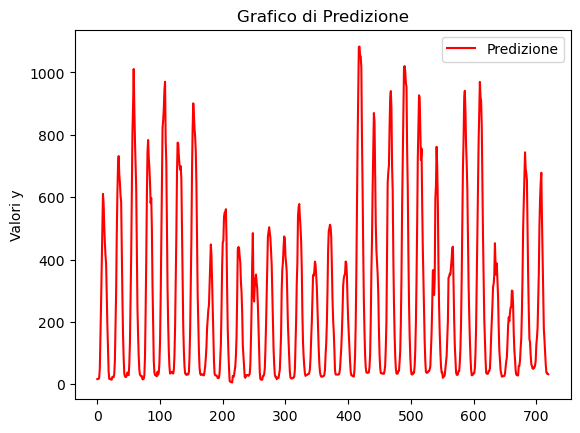

In [21]:
plt.plot(range(len(y_pred_A)), y_pred_A, label='Predizione', color='red', linestyle='-')

# Aggiungi una legenda
plt.legend()

# Aggiungi etichette agli assi
plt.ylabel('Valori y')

# Titolo del grafico
plt.title('Grafico di Predizione')

# Mostra il grafico
plt.show()

In [18]:
df = pd.DataFrame({'Prediction':y_pred_A})

In [19]:
threshold = 0.05
df['Prediction'] = df['Prediction'].apply(lambda x: 0 if x < threshold else x)

In [20]:
df.to_csv('B1.csv')
df

,Prediction
0,16.851649
1,17.454406
2,17.454406
3,20.589302
4,51.681062
...,...
715,64.851562
716,38.606180
717,34.139282
718,34.448856
